In [1]:
import os
from piblin.dataio import read_file
from hermes_rheo.transforms.rheo_analysis import RheoAnalysis 
from hermes_rheo.transforms.automated_mastercurve import AutomatedMasterCurve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #To avoid displaying annoying warnings from sklearn

In [2]:
# Get the current directory where the notebook is located
current_dir = os.path.dirname(os.path.abspath("__file__"))  # Use "__file__" to get the notebook's directory

# Construct the relative path
filepath_frequency_sweep_tts = os.path.join(current_dir, 'tutorial_data', 'tutorial_4', 'frequency_sweep_tts.txt')
filepath_owchirp_tts = os.path.join(current_dir, 'tutorial_data', 'tutorial_4', 'owchirp_tts.txt')

In [3]:
experiment_sweep = read_file(filepath_frequency_sweep_tts, create_composite_datasets=True)
pipeline_sweep = RheoAnalysis() + AutomatedMasterCurve(state='temperature', state_mode='average', y='complex modulus', vertical_shift=False, reverse_data=True) 
sweep_mastercurve_complex_modulus = pipeline_sweep(experiment_sweep)

experiment_owchirp = read_file(filepath_owchirp_tts, create_composite_datasets=True)
pipeline_owchirp = RheoAnalysis() + AutomatedMasterCurve(state='temperature', state_mode='average', y='complex modulus', vertical_shift=False, reverse_data=False) 
chirp_mastercurve_complex_modulus = pipeline_owchirp(experiment_owchirp)

In [4]:
print(sweep_mastercurve_complex_modulus.states[6])
print(chirp_mastercurve_complex_modulus.states[6])

20.004937052726735
19.991830753825464


In [5]:
sweep_mastercurve_complex_modulus.change_ref(sweep_mastercurve_complex_modulus.states[13])
chirp_mastercurve_complex_modulus.change_ref(chirp_mastercurve_complex_modulus.states[13])

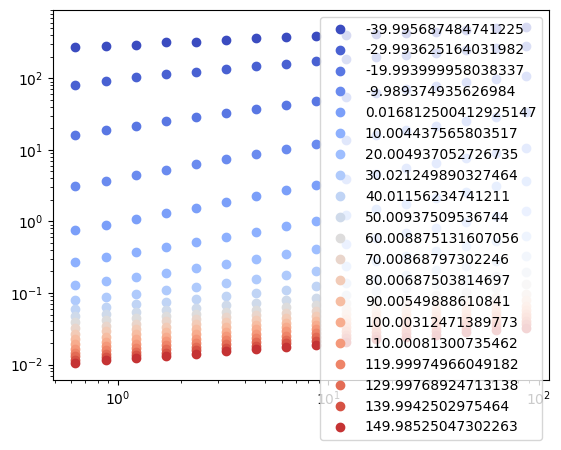

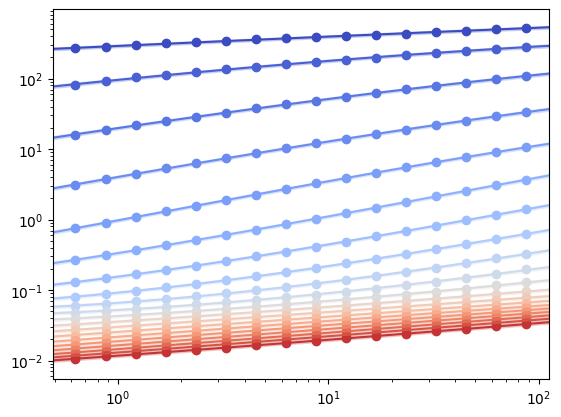

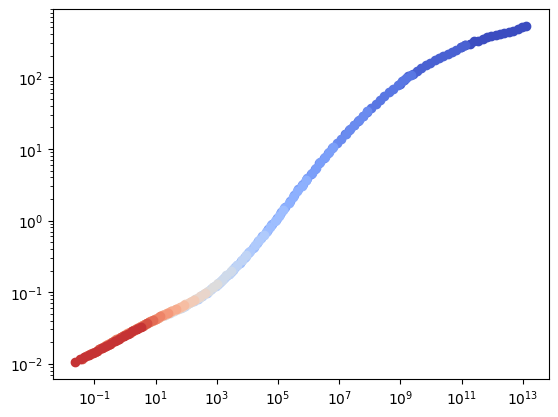

In [6]:
fig1, ax1, fig2, ax2, fig3, ax3 = sweep_mastercurve_complex_modulus.plot(colormap=plt.cm.coolwarm, )

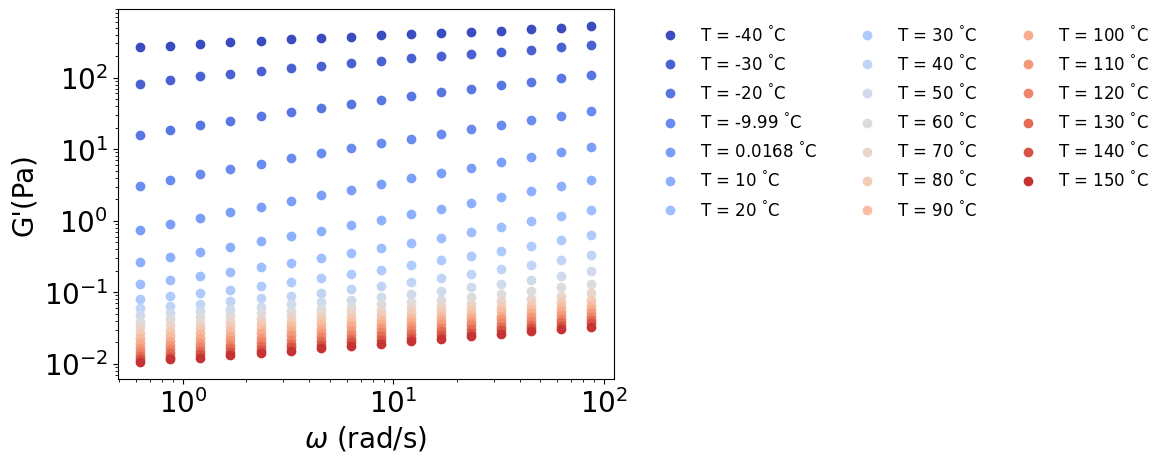

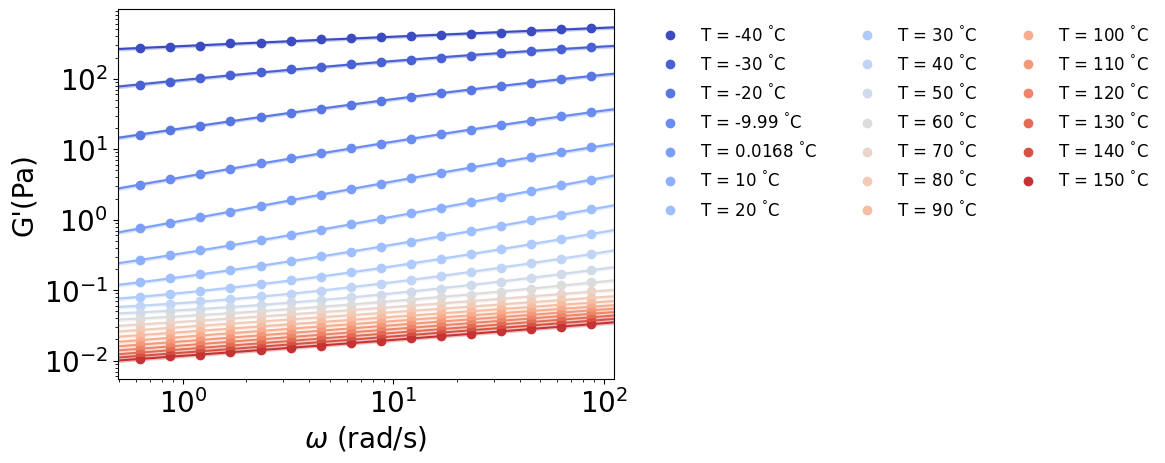

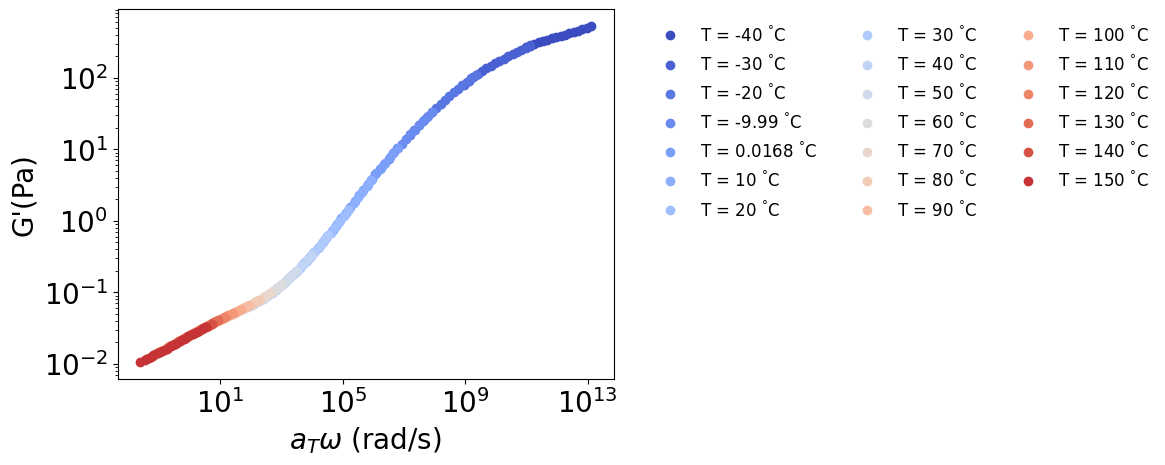

In [7]:
fig1, ax1, fig2, ax2, fig3, ax3 = sweep_mastercurve_complex_modulus.plot(colormap=plt.cm.coolwarm, )
handles, labels = ax2.get_legend_handles_labels()
formatted_labels = ['t = {:.3g} s'.format(float(label)) for label in labels]
ax1.legend(handles, formatted_labels, fontsize=12, ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.legend(handles, formatted_labels, fontsize=12, ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
# Set x and y labels
ax1.set_xlabel("$\omega$ (rad/s)", fontsize = 20)
ax1.set_ylabel("G\'(Pa)", fontsize = 20)

# Set font size for x and y tick labels on ax2
ax1.tick_params(axis='x', labelsize=20)  # For x-axis ticks
ax1.tick_params(axis='y', labelsize=20)  # For y-axis ticks

# Format the legend
handles, labels = ax1.get_legend_handles_labels()
formatted_labels = ['T = {:.3g} $^\degree$C'.format(float(label)) for label in labels]
ax1.legend(handles, formatted_labels, fontsize=12, ncol=3, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Assuming mastercurve_complex_modulus.plot(...) has already been executed as given

# Set x and y labels for ax2 and ax3
ax2.set_xlabel("$\omega$ (rad/s)", fontsize=20)
ax2.set_ylabel("G\'(Pa)", fontsize=20)  # Assuming G" for ax2
ax3.set_xlabel("$a_T\omega$ (rad/s)", fontsize=20)
ax3.set_ylabel("G\'(Pa)", fontsize=20)  # Assuming |G*| for ax3
#ax2.set_ylim(1e3,1e9)
#ax3.set_ylim(1e3,1e9)


# Set font size for x and y tick labels on ax2 and ax3
ax2.tick_params(axis='x', labelsize=20)  # For x-axis ticks
ax2.tick_params(axis='y', labelsize=20)  # For y-axis ticks
ax3.tick_params(axis='x', labelsize=20)  # For x-axis ticks
ax3.tick_params(axis='y', labelsize=20)  # For y-axis ticks

# Assuming the labels for ax2 and ax3 are to be formatted similarly to ax1
# Format and set the legend for ax2
handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()
formatted_labels_ax2 = ['T = {:.3g} $^\degree$C'.format(float(label)) for label in labels_ax2]
ax2.legend(handles_ax2, formatted_labels_ax2, fontsize=12, ncol=3, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Format and set the legend for ax3
handles_ax3, labels_ax3 = ax3.get_legend_handles_labels()
formatted_labels_ax3 = ['T = {:.3g} $^\degree$C'.format(float(label)) for label in labels_ax3]
ax3.legend(handles_ax3, formatted_labels_ax3, fontsize=12, ncol=3, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)


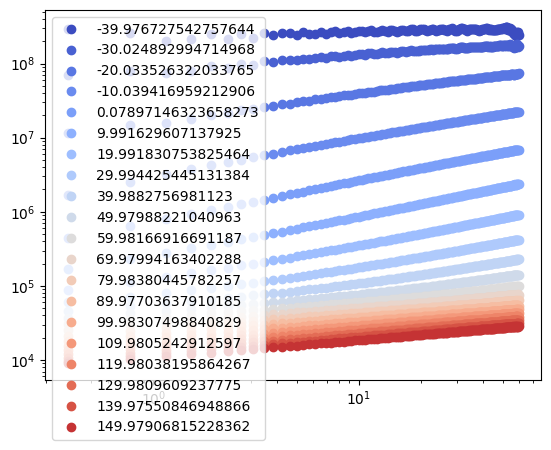

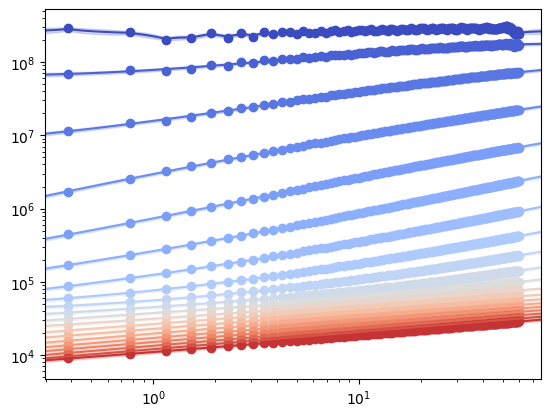

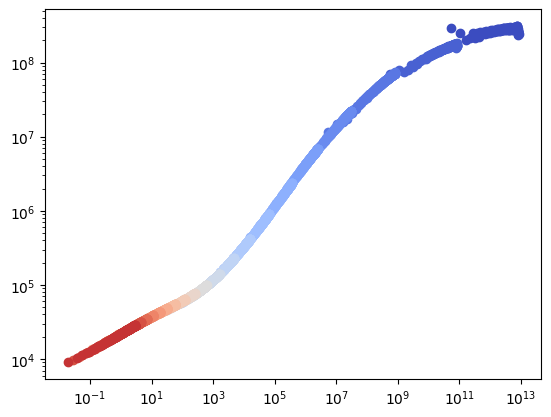

In [8]:
fig4, ax4, fig5, ax5, fig6, ax6 = chirp_mastercurve_complex_modulus.plot(colormap=plt.cm.coolwarm, )

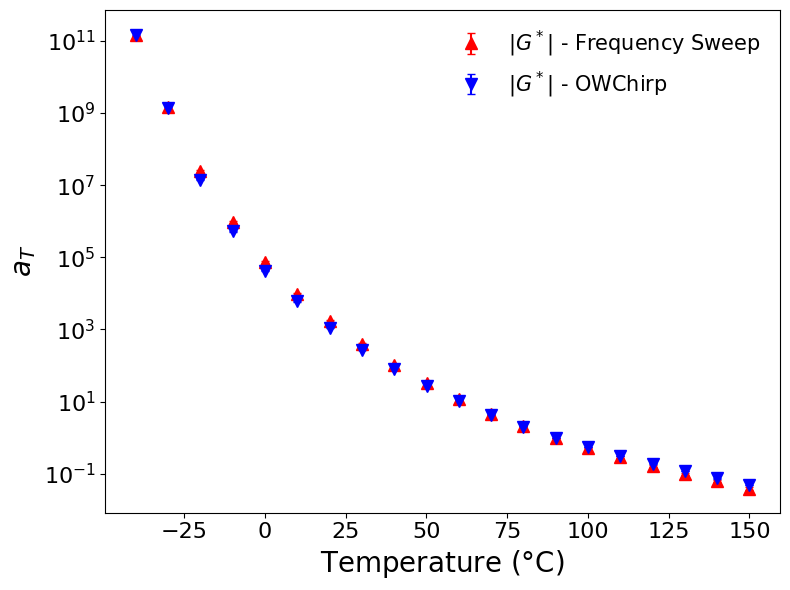

In [9]:
a_complex_sweep = sweep_mastercurve_complex_modulus.hparams[0]
a_complex_chirp = chirp_mastercurve_complex_modulus.hparams[0]
a_complex_uncertainties_sweep = sweep_mastercurve_complex_modulus.huncertainties[0]
a_complex_uncertainties_chirp = chirp_mastercurve_complex_modulus.huncertainties[0]

states = sweep_mastercurve_complex_modulus.states  


plt.figure(figsize=(8, 6))

# Plot each set of shift factors with error bars
plt.errorbar(states, a_complex_sweep, yerr=a_complex_uncertainties_sweep, c='red', fmt='^', label="$|G^*|$ - Frequency Sweep", markersize=8, linestyle='none', capsize=3)
plt.errorbar(states, a_complex_chirp, yerr=a_complex_uncertainties_chirp,c='blue', fmt='v', label="$|G^*|$ - OWChirp", markersize=8, linestyle='none', capsize=3)

plt.xlabel("Temperature ($\degree$C)", fontsize=20)
plt.ylabel("$a_T$", fontsize=20)
plt.xscale('linear')  # Assuming states are best represented in a linear scale
plt.yscale('log')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.legend(fontsize=15, loc='best', frameon=False, ncol=1)

# Remove grid and apply tight layout for better spacing
plt.tight_layout()
plt.show()
